In [1]:
# @itsvenu_
# RNN with LongSshort-TermMemory - Google stock price

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
print(tf.__version__)

# RNN reqs
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

2.3.1


In [3]:
datTrain = pd.read_csv('../../data-dl/Google_Stock_Price_Train.csv')
datTrain.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
datTrain = datTrain.iloc[:, 1:2]
datTrain.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [5]:
# make the traning set
training_set = datTrain.values
training_set[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [6]:
training_set.shape

(1258, 1)

In [7]:
# feature scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

In [8]:
# number of time-steps
# 60 time-steps, 1 output
# for every 60 day data, predict 61st day's outcome

X_train = []
Y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0]) # upperbound excluded
    Y_train.append(training_set_scaled[i, 0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [9]:
# add a new dimension - Keras RNN expects this format
# unit - number of predictors

# reshape to fit RNN
batch_size = X_train.shape[0]
time_steps = X_train.shape[1] 
# 1 is 'open' column from the data

X_train = np.reshape(X_train, (batch_size, time_steps, 1))

In [10]:
X_train.shape

(1198, 60, 1)

In [11]:
# build RNN
regressor = Sequential()

In [12]:
# 1st LSTM layer
# dropout regularization to avoid overfitting

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))

In [13]:
# 20% of neurons will be ignores
# in each iteration of training
regressor.add(Dropout(0.2))

In [14]:
# 2nd LSTM + Dropout reg

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
# 3rd LSTM + Dropout reg

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [16]:
# 4th LSTM + Dropout reg

regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(Dense(units=1))

In [18]:
# compile RNN

regressor.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
regressor.fit(x=X_train, y=Y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0335
Epoch 2/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0052
Epoch 11/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0044
Epoch 13/100


38/38 [==============================] - 5s 123ms/step - loss: 0.0014


In [22]:
# make predictions
datTest = pd.read_csv('../../data-dl/Google_Stock_Price_Test.csv')
datTest.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [23]:
datTest = datTest.iloc[:, 1:2]
real_stock_price = datTest.values

In [25]:

dataset_total = pd.concat((datTrain['Open'], datTest['Open']), axis=0)

inputs = dataset_total[len(dataset_total) - len(datTest) - 60:].values

inputs = inputs.reshape(-1, 1)

In [26]:
inputs = sc.transform(inputs)

In [27]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0]) # upperbound excluded
    
X_test = np.array(X_test)

In [29]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [31]:
predicted_stock_price = regressor.predict(X_test)

In [33]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [35]:
mean_squared_error(real_stock_price, predicted_stock_price)

118.08686602989755

Text(0, 0.5, 'Stock price')

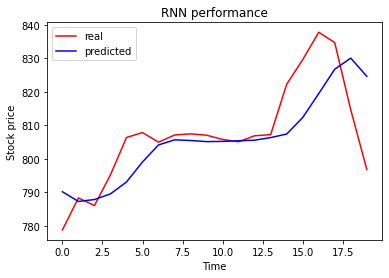

In [41]:
plt.plot(real_stock_price, color = 'red', label='real')
plt.plot(predicted_stock_price, color = 'blue', label='predicted')
plt.legend()
plt.title('RNN performance')
plt.xlabel('Time')
plt.ylabel('Stock price')

In [ ]:
# pretty good prediction